In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

# Datos Cuantitativos Agrupados

En estadistica existen innumerables motivos por los cuales nos interesa agrupar los datos cuando estos son cuantitativos. Uno de estos motivos puede ser perfectamente que los datos sean muy **HETEROGENEOS**.

## Ejemplo 

El siguiente grafico presenta demasiada heterogeneidad


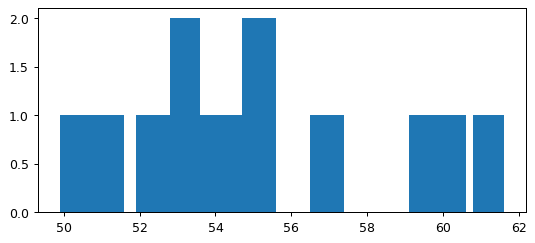

In [38]:
pesos = np.array((55.2,54,55.2,53.7,60.2,53.2,54.6,55.1,51.2,53.2,54.8,52.3,
                  56.9,57,55,53.5,50.9,55.1,53.6,61.2,59.5,50.3,52.7,60))

pesos, count = np.unique(pesos, return_counts = True)

print('El siguiente grafico presenta demasiada heterogeneidad')
plt.figure(figsize=(7,3), dpi=90)
plt.bar(pesos, height = count)
plt.show()

Por lo general, existen 3 situaciones en las cuales conviene sin lugar a dudas agrupar datos cuantitativos en intervalos, tambien llamados clases.
    - Cuando los datos son continuos, su redondeo ya define un agrupamiento debido a la inexistencia de precision infinita
    - Cuando los datos son discretos, pero con un numero considerablemente grande de posibles valores
    - Cuando tenemos muchisimos datos y estamos interesados en estudiar las frecuencias de sus valores

## ¿Como agrupar los datos?

Debemos definir lo siguiente:
1. Decidir el numero de intervalos que vamos a utilizar (clases)
2. Decidir la amplitud de los intervalos
3. Acumular los extremos de los intervalos
4. Calcular el valor representativo de cada intervalo, su marca de clase

No hay forma de agrupar los datos mejor que otra. Eso sì, cada uno de los diferentes agrupamientos para un conjunto de datos podrìa sacar a la luz caracteristicas de diferentes conjunto.

## 1. Estableciendo el numero de clases

Lo primero es establecer el numero $k$ de clases en las que vamos a dividir nuestros datos. Podemos hacer uso de las reglas mas populares. Sea $"n"$ el numero total de datos de la muestra:

* **Regla de la raiz cuadrada:** k = $\sqrt{n}$
* **Regla de Sturges:** k = [1+ log<sub>2</sub>(n)]
* **Regla de Scott:** Se determina primero la amplitud teorica, A<sub>s</sub> de las clases. A<sub>s</sub> = 3.5 $\cdot$ s $\cdot$ n$^{^-1/3}$ donde s es la desviacion tipica muestral. Luego se toma:  $ \large k =[\frac{max(x)-min(x)}{A_s}]$


A diferencia de la regla de la raíz cuadrada y Sturges las cuales son buenas para conjuntos de datos pequeños, sin embargo la de Sturges es preferible para conjunto de datos que presenten muchos datos atipicos.



## 2. Decidiendo la amplitud (A)

Una vez determinado $k$, hay que decidir su amplitud.

La forma mas facil es que la amplitud sea la misma para todos los intervalos, sin embargo esta no es la unica. 

Para calcular la $A$, se divide el rango del conjunto de datos entre $k$ (numero de clases) y redondearemos por exceso a un valor de la presicion de la media. Si se da el caso en que el cociente de exacto, tomaremos como $A$ ese cociente mas una unidad de presicion.


## 3. Extremos de los intervalos 

Para los intervalos siempre consideraremos que son cerrados por su izquierda y abiertos por la derecha, debido a que asi se usan en Teoria de Probabilidades al definir la distribucion de una variable aleatoria discreta y en muchas otras situaciones.

Utilizaremos la notacion: [$L_1,L_2$),[$L_2,L_3$)....,[$L_k,L_{k+1}$)

donde los $L_i$ denotan los extremos de los intervalos. Estos se calculan de la siguiente manera: $L_1 = $ min(x) - $\frac{1}{2} \cdot precision$

El resto de intervalos se obtiene de forma recursiva:
<center> $\large L_2$ = $L_1 + A$ ...</center>
<center> $\large L_{k+1}$ = $L_{k} + A$ </center>


## 4. Marca de clase

Solo nos queda determinar la marca de clase, $X_i$, de cada intervalo [$\large L_i,L_{i+1}$).

Este no es mas que un valor del intervalo que utilizaremos para identificar la clase y para calcular algunos estadisticos.
<center> $\Large X_i = \frac{L_i + L_{i+1}}{2}$</center>


## Ejemplo

In [29]:
titanic = sb.load_dataset('titanic')
data = titanic['age'].dropna()
data = np.array(data)

In [37]:
print('1. Establecemos el numero de clases, utilizando la regla de Sturges:')
k = np.ceil(1 + np.log2(len(data)))
k

1. Establecemos el numero de clases, utilizando la regla de Sturges:


11.0

In [38]:
print('2. Definimos la amplitud de los intervalos, en este caso seria:')
min = np.min(data)
max = np.max(data)

A = np.ceil((max - min)/k)
A

2. Definimos la amplitud de los intervalos, en este caso seria:


8.0

La funcion $\large freq$_$\large table$ arma una tabla de frecuencia a partir de ciertos parametros que entregamos, los intervalos y marca de clase se calculan dentro de la funcion:
* x = columna cuantitativa de nuestro dataset
* k = numero de clases 
* A = amplitud de las clases
* p = presicion

In [81]:
def freq_table(x, k, A, p):
    L = np.min(x)-p/2+A*np.arange(0,k)
    x_cut = pd.cut(x, bins = L, right=False)
    mc = (L[0]+L[1])/2+A*np.arange(0,(k-1))
    unique,count = np.unique(x_cut, return_counts = True)
    
    abs_freq = count
    acum_abs_freq = np.cumsum(abs_freq)
    rel_freq = count/count.sum()
    acum_rel_freq = np.cumsum(rel_freq)
    
    freq_tab = pd.DataFrame({
                        "intervals": unique,
                        "mc": mc,
                        "abs_freq": abs_freq,
                        "acum_abs_freq": acum_abs_freq,
                        "rel_freq": rel_freq,
                        "acum_rel_freq": acum_rel_freq,
                    })
    return freq_tab
    

In [82]:
freq_table(data,k,A,0.01)

,intervals,mc,abs_freq,acum_abs_freq,rel_freq,acum_rel_freq
0,"[0.415, 8.415)",4.415,54,54,0.075630,0.075630
1,"[8.415, 16.415)",12.415,46,100,0.064426,0.140056
2,"[16.415, 24.415)",20.415,177,277,0.247899,0.387955
3,"[24.415, 32.415)",28.415,169,446,0.236695,0.624650
4,"[32.415, 40.415)",36.415,118,564,0.165266,0.789916
5,"[40.415, 48.415)",44.415,70,634,0.098039,0.887955
6,"[48.415, 56.415)",52.415,45,679,0.063025,0.950980
7,"[56.415, 64.415)",60.415,24,703,0.033613,0.984594
8,"[64.415, 72.415)",68.415,9,712,0.012605,0.997199
9,"[72.415, 80.415)",76.415,2,714,0.002801,1.000000
